In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
import keras
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization

from keras.callbacks import EarlyStopping, ModelCheckpoint
warnings.filterwarnings('ignore')

In [16]:
train_df=pd.read_csv('mitbih_train.csv',header=None)
test_df=pd.read_csv('mitbih_test.csv',header=None)

In [17]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


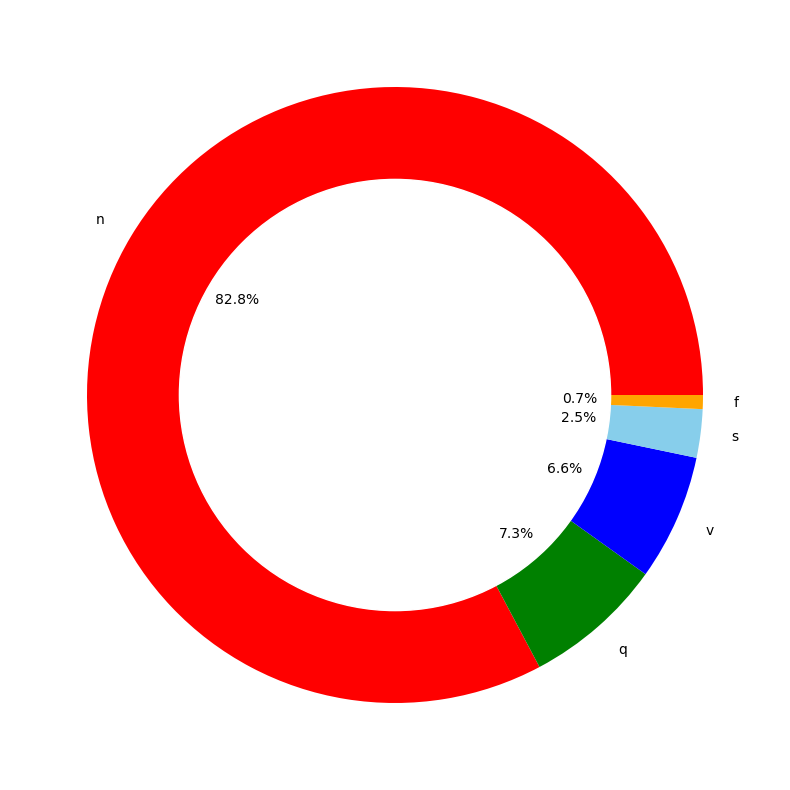

In [18]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [19]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


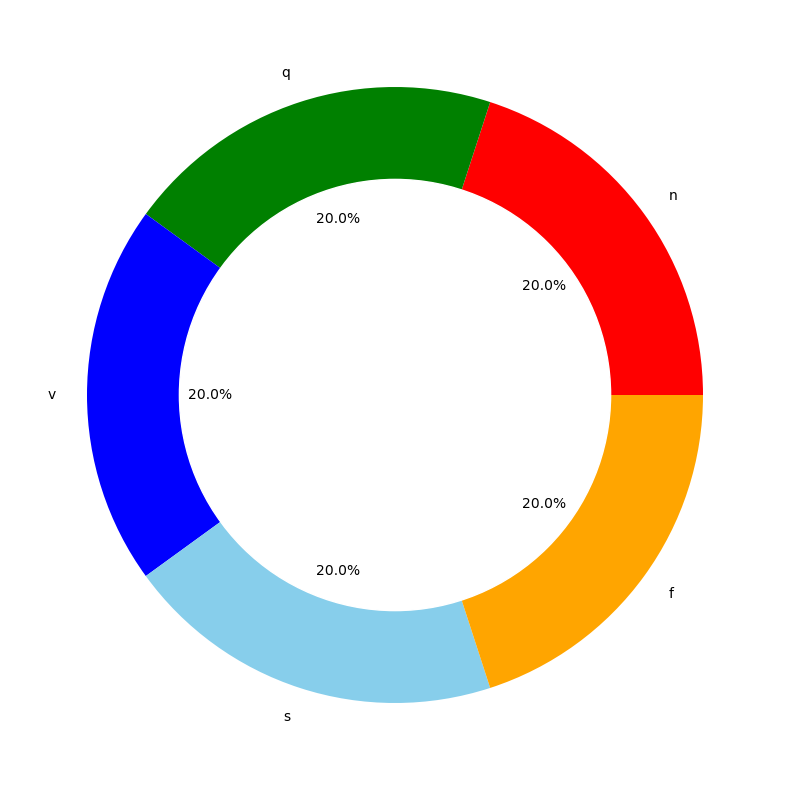

In [20]:
equilibre=train_df[187].value_counts()
print(equilibre)

plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

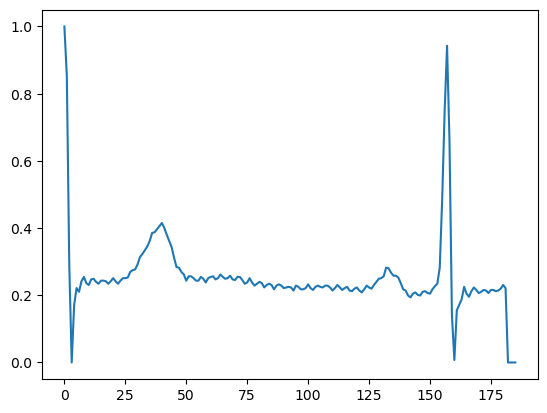

In [21]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c
plt.plot(c.iloc[0,:186])

In [22]:
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

PRETREAT

In [23]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

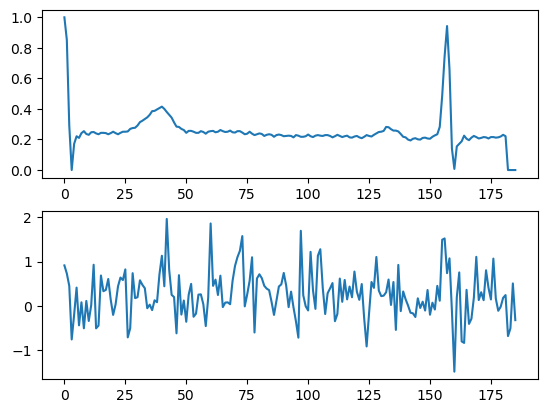

In [24]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [25]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [26]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

Entrenamiento del modelo con las caracteristicas extraidas:

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils.np_utils import to_categorical

# Cargar datos
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')

# Preprocesar los datos
X_train = df_train.iloc[:, 2:].values
y_train = df_train.iloc[:, 1].values
X_test = df_test.iloc[:, 2:].values
y_test = df_test.iloc[:, 1].values

# Convertir etiquetas a numéricas
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Codificar las etiquetas
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cambiar la forma de los datos para la red
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)


In [56]:
print(f"X_train samples: {X_train.shape[0]}")
print(f"y_train samples: {y_train.shape[0]}")
print(f"X_test samples: {X_test.shape[0]}")
print(f"y_test samples: {y_test.shape[0]}")

#Por qué hay pocos datos y falta una clase?

X_train samples: 480
y_train samples: 480
X_test samples: 120
y_test samples: 120


In [59]:
model, history = network(X_train, y_train, X_test, y_test)

Epoch 1/40
15/15 [==============================] - 2s 44ms/step - loss: 1.3905 - accuracy: 0.3833 - val_loss: 1.3576 - val_accuracy: 0.3000
Epoch 2/40
15/15 [==============================] - 0s 10ms/step - loss: 0.9994 - accuracy: 0.6083 - val_loss: 1.3537 - val_accuracy: 0.3167
Epoch 3/40
15/15 [==============================] - 0s 10ms/step - loss: 0.8510 - accuracy: 0.6687 - val_loss: 1.3533 - val_accuracy: 0.3333
Epoch 4/40
15/15 [==============================] - 0s 10ms/step - loss: 0.7614 - accuracy: 0.6875 - val_loss: 1.3524 - val_accuracy: 0.3250
Epoch 5/40
15/15 [==============================] - 0s 5ms/step - loss: 0.6822 - accuracy: 0.7500 - val_loss: 1.3561 - val_accuracy: 0.3167
Epoch 6/40
15/15 [==============================] - 0s 6ms/step - loss: 0.6019 - accuracy: 0.7917 - val_loss: 1.3554 - val_accuracy: 0.3167
Epoch 7/40
15/15 [==============================] - 0s 6ms/step - loss: 0.5508 - accuracy: 0.8125 - val_loss: 1.3738 - val_accuracy: 0.2917
Epoch 8/40
15/15

Accuracy: 32.50%


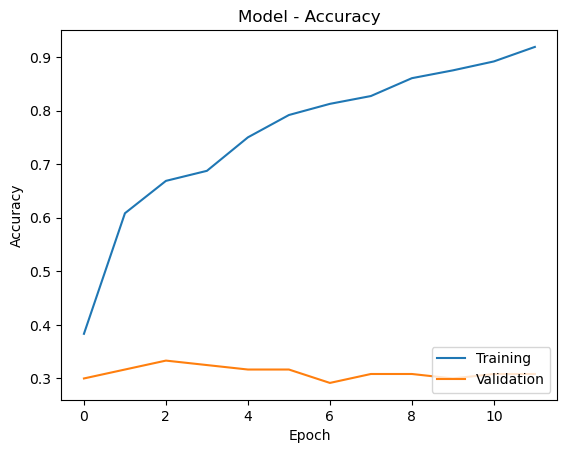

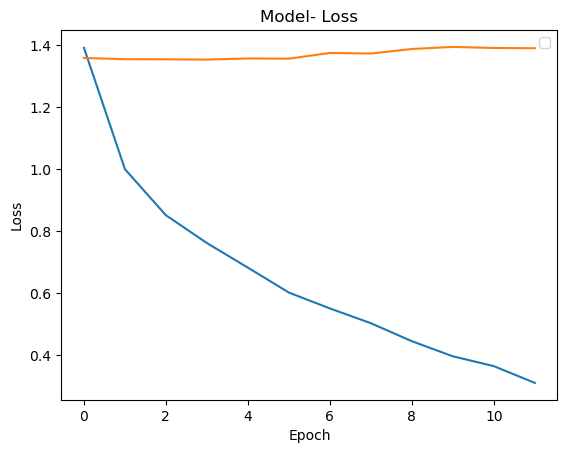

4/4 [==============================] - 0s 2ms/step


In [61]:
evaluate_model(history,X_test,y_test,model)

In [58]:
def network(X_train, y_train, X_test, y_test):
    im_shape = (X_train.shape[1], 1)
    inputs_cnn = Input(shape=im_shape, name='inputs_cnn')

    # Capa Conv1D #1
    conv1_1 = Convolution1D(64, 3, activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1 = BatchNormalization()(conv1_1)
    pool1 = MaxPool1D(pool_size=2, strides=2, padding="same")(conv1_1)

    # Capa Conv1D #2
    conv2_1 = Convolution1D(64, 3, activation='relu')(pool1)
    conv2_1 = BatchNormalization()(conv2_1)
    pool2 = MaxPool1D(pool_size=2, strides=2, padding="same")(conv2_1)

    # Aplanar y capas densas
    flatten = Flatten()(pool2)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(4, activation='softmax', name='main_output')(dense_end2)

    # Compilar el modelo
    model = Model(inputs=inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
                 ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    # Entrenamiento
    history = model.fit(X_train, y_train, epochs=40, callbacks=callbacks, batch_size=32, validation_data=(X_test, y_test))
    model.load_weights('best_model.h5')

    return model, history


In [60]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [17]:
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 [==============================] - 47s 14ms/step - loss: 0.9006 - accuracy: 0.6543 - val_loss: 1.0269 - val_accuracy: 0.6084
Epoch 2/40
3125/3125 [==============================] - 43s 14ms/step - loss: 0.7931 - accuracy: 0.6994 - val_loss: 0.7240 - val_accuracy: 0.7232
Epoch 3/40
3125/3125 [==============================] - 44s 14ms/step - loss: 0.7598 - accuracy: 0.7120 - val_loss: 0.9165 - val_accuracy: 0.6908
Epoch 4/40
3125/3125 [==============================] - 42s 13ms/step - loss: 0.7320 - accuracy: 0.7210 - val_loss: 0.9402 - val_accuracy: 0.6438
Epoch 5/40
3125/3125 [==============================] - 43s 14ms/step - loss: 0.7057 - accuracy: 0.7314 - val_loss: 0.9195 - val_accuracy: 0.6613
Epoch 6/40
3125/3125 [==============================] - 41s 13ms/step - loss: 0.6790 - accuracy: 0.7425 - val_loss: 0.8820 - val_accuracy: 0.6858
Epoch 7/40
3125/3125 [==============================] - 41s 13ms/step - loss: 0.6530 - accuracy: 0.7527 - val_loss: 0.9506 -

Accuracy: 72.32%


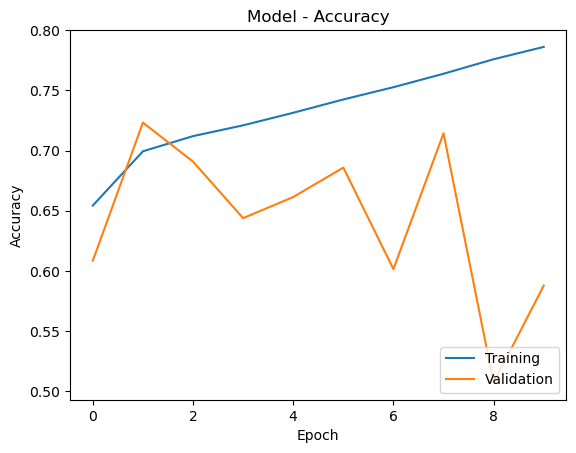

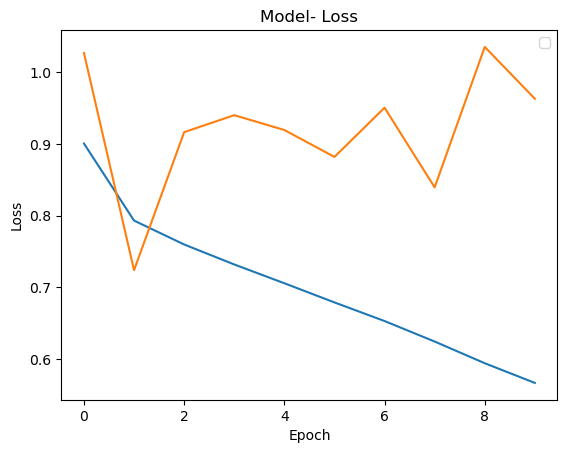

685/685 [==============================] - 4s 6ms/step


In [18]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

In [19]:
import pywt
def apply_wavelet_transform(signal, wavelet='db4', level=4):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    # Aplanar los coeficientes para obtener un único vector de características
    flattened_coeffs = np.hstack([coeff.flatten() for coeff in coeffs])
    return flattened_coeffs

def preprocess_data_with_wavelets(X):
    # Aplica la transformación wavelet a cada muestra en X
    return np.array([apply_wavelet_transform(signal) for signal in X])

X_train_wavelet = preprocess_data_with_wavelets(X_train)
X_test_wavelet = preprocess_data_with_wavelets(X_test)

# Redimensionar para la red neuronal
X_train_wavelet = X_train_wavelet.reshape(X_train_wavelet.shape[0], X_train_wavelet.shape[1], 1)
X_test_wavelet = X_test_wavelet.reshape(X_test_wavelet.shape[0], X_test_wavelet.shape[1], 1)

In [20]:
model, history = network(X_train_wavelet, y_train, X_test_wavelet, y_test)

Epoch 1/40
3125/3125 [==============================] - 1819s 581ms/step - loss: 1.0937 - accuracy: 0.5735 - val_loss: 5.7308 - val_accuracy: 0.1154
Epoch 2/40
3125/3125 [==============================] - 1831s 586ms/step - loss: 0.9705 - accuracy: 0.6241 - val_loss: 2.5955 - val_accuracy: 0.1405
Epoch 3/40
3125/3125 [==============================] - 3042s 974ms/step - loss: 0.9343 - accuracy: 0.6407 - val_loss: 1.2337 - val_accuracy: 0.4658
Epoch 4/40
3125/3125 [==============================] - 2689s 860ms/step - loss: 0.9044 - accuracy: 0.6515 - val_loss: 1.1997 - val_accuracy: 0.4950
Epoch 5/40
3125/3125 [==============================] - 1826s 584ms/step - loss: 0.8722 - accuracy: 0.6663 - val_loss: 1.5172 - val_accuracy: 0.2180
Epoch 6/40
3125/3125 [==============================] - 1554s 497ms/step - loss: 0.8488 - accuracy: 0.6771 - val_loss: 1.6509 - val_accuracy: 0.2515
Epoch 7/40
3125/3125 [==============================] - 1574s 504ms/step - loss: 0.8234 - accuracy: 0.6889

Normalized confusion matrix


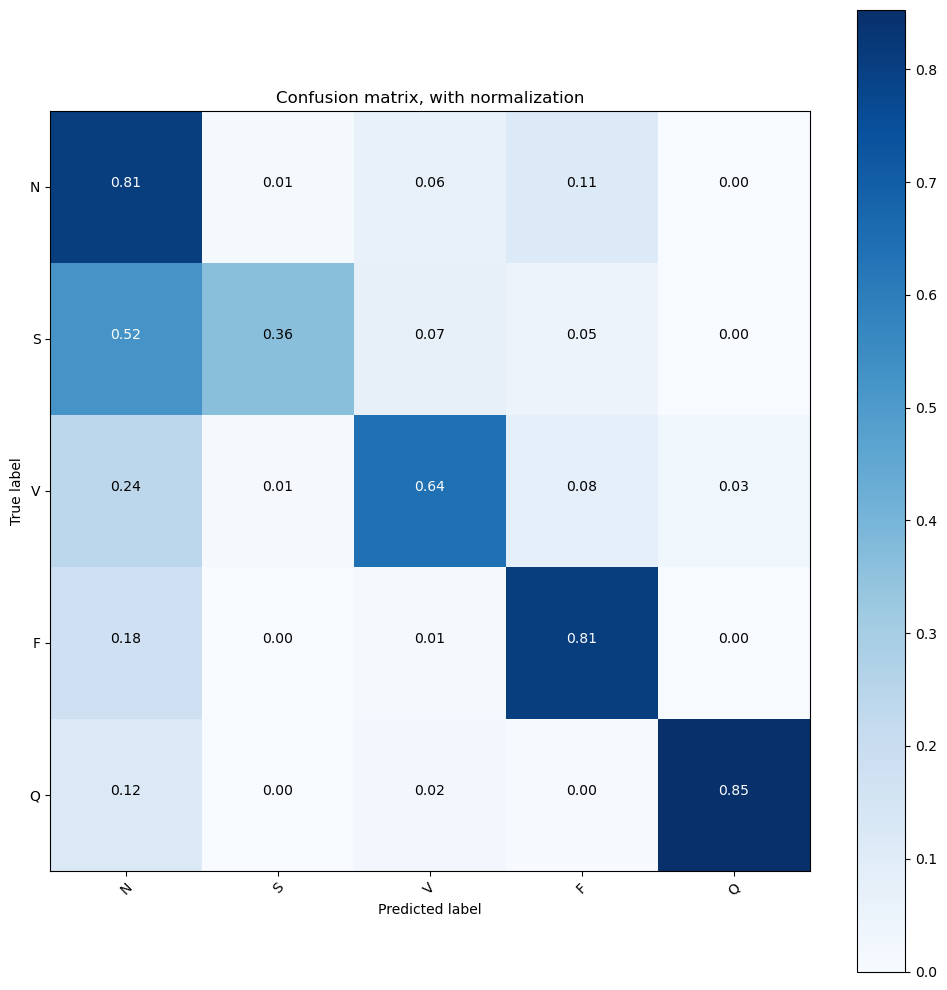

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()